Les traitements sont en cours pour le mois de Mai, cela pourrait prendre quelques minutes...
Nombre de doublons primaires détectés: 94


C:\Users\Wilfried KOMENAN\AppData\Local\Temp\ipykernel_17140\1876446236.py:201: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['title'].str.contains(housing_types_pattern, case=False, na=False)]


Nombre de doublons secondaires détectés: 25
Restants 239
Fichier final avec les modifications sauvegardé sous D:\Bureau\MemoiresStages\Travaux_techniques\Traitements\Datasets\Mai.csv
commune
bingerville    4.000000e+05
cocody         9.389487e+05
le plateau     1.166667e+06
marcory        1.257353e+06
Name: price, dtype: float64


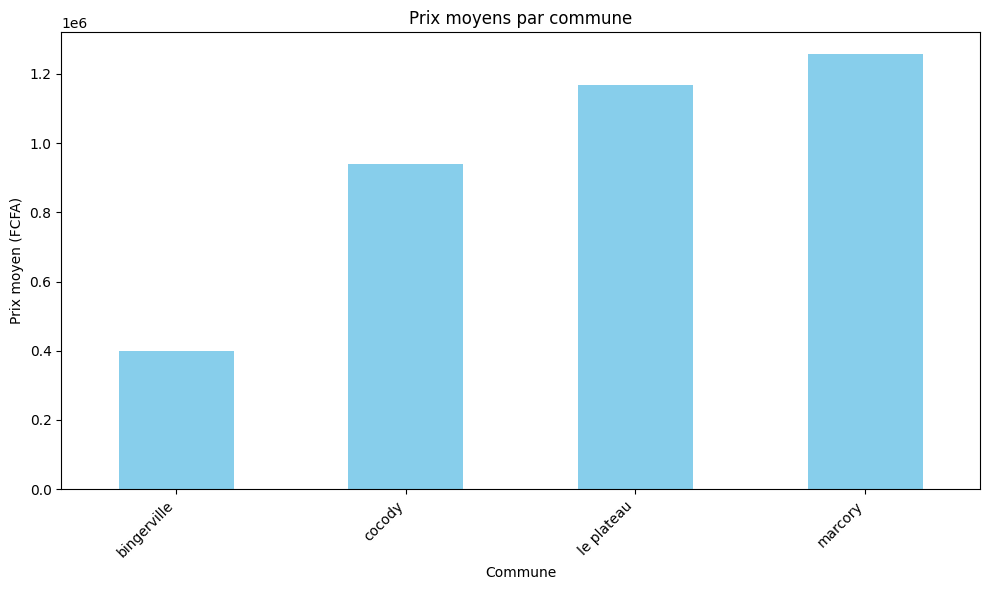

code_var 2014
401000008    6.866667e+05
401000002    9.398451e+05
401000006    1.900000e+06
401000010    2.433333e+06
Name: price, dtype: float64


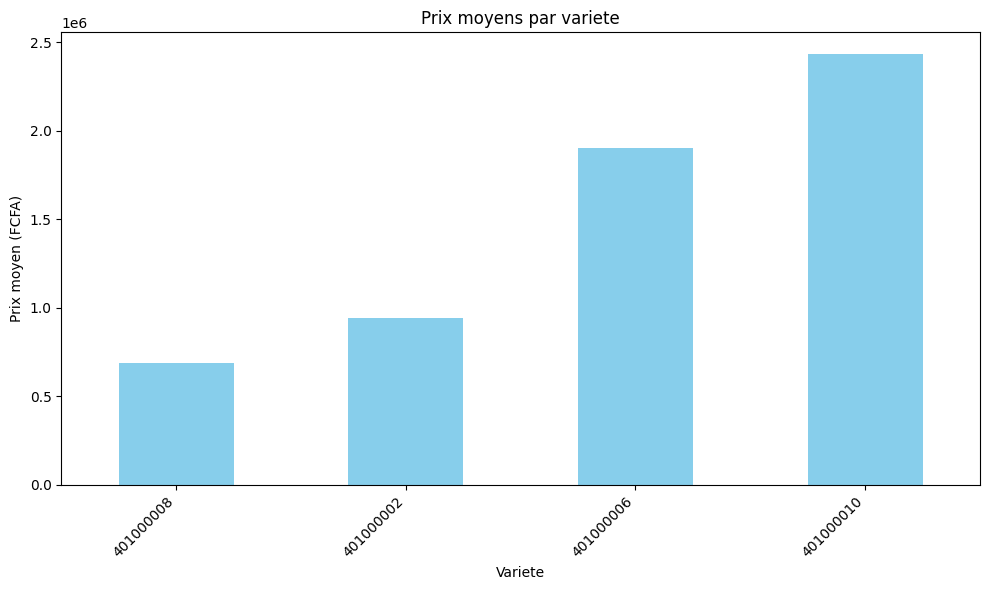

Les traitements sont en cours pour le mois de Juin, cela pourrait prendre quelques minutes...


C:\Users\Wilfried KOMENAN\AppData\Local\Temp\ipykernel_17140\1876446236.py:201: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['title'].str.contains(housing_types_pattern, case=False, na=False)]


Nombre de doublons primaires détectés: 103155
Nombre de doublons secondaires détectés: 529
Restants 879
Key not found: ('duplex', '2 et 3 pièces', '1', '1', '1', '1', '0', '0')
Fichier final avec les modifications sauvegardé sous D:\Bureau\MemoiresStages\Travaux_techniques\Traitements\Datasets\Juin.csv
commune
yopougon       1.527778e+05
abobo          2.650000e+05
bingerville    3.000000e+05
adjamé         3.900000e+05
treichville    5.500000e+05
koumassi       6.362500e+05
cocody         8.266181e+05
marcory        1.003385e+06
le plateau     1.183333e+06
port-bouët     1.500000e+06
Name: price, dtype: float64


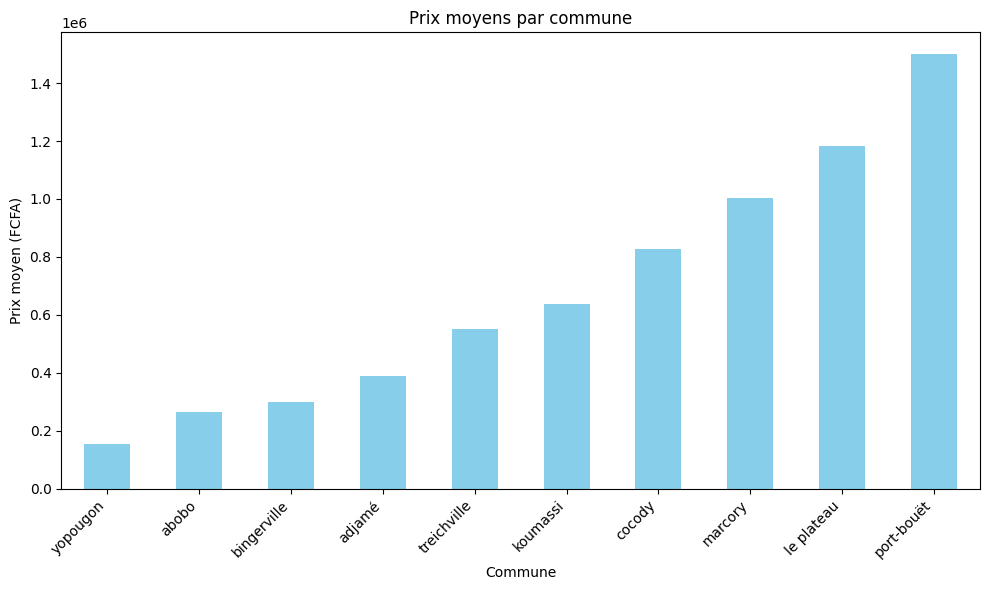

code_var 2014
401000011    1.550000e+05
401000008    3.376667e+05
401000002    8.169816e+05
401000006    1.657692e+06
401000010    2.068750e+06
Name: price, dtype: float64


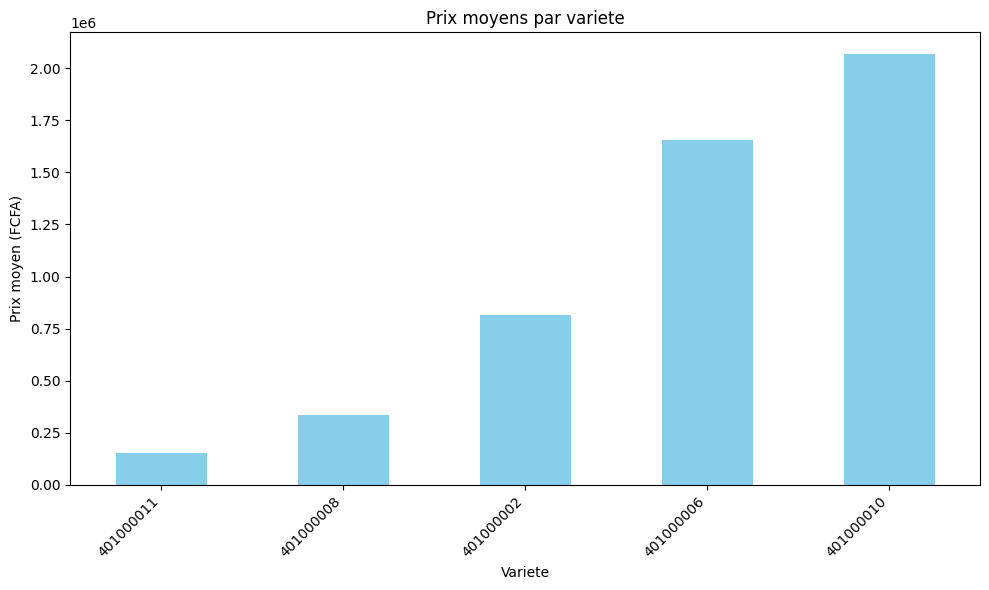

Les traitements sont en cours pour le mois de Juillet, cela pourrait prendre quelques minutes...


C:\Users\Wilfried KOMENAN\AppData\Local\Temp\ipykernel_17140\1876446236.py:201: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['title'].str.contains(housing_types_pattern, case=False, na=False)]


Nombre de doublons primaires détectés: 142744
Nombre de doublons secondaires détectés: 2277
Restants 2937
Key not found: ('duplex', '2 et 3 pièces', '1', '1', '1', '1', '0', '0')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '0')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '0')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '1')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '1')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '1')
Key not found: ('studio', '4 pièces et plus', '1', '1', '1', '1', '0', '0')
Key not found: ('duplex', '2 et 3 pièces', '1', '1', '1', '1', '0', '0')
Key not found: ('duplex', '2 et 3 pièces', '1', '1', '1', '1', '0', '1')
Key not found: ('duplex', '2 et 3 pièces', '1', '1', '1', '1', '0', '1')
Fichier final avec les modifications sauvegardé sous D:\Bureau\MemoiresStages\Travaux_techniques\Traitements\Datasets\Juillet.csv
commune
songon  

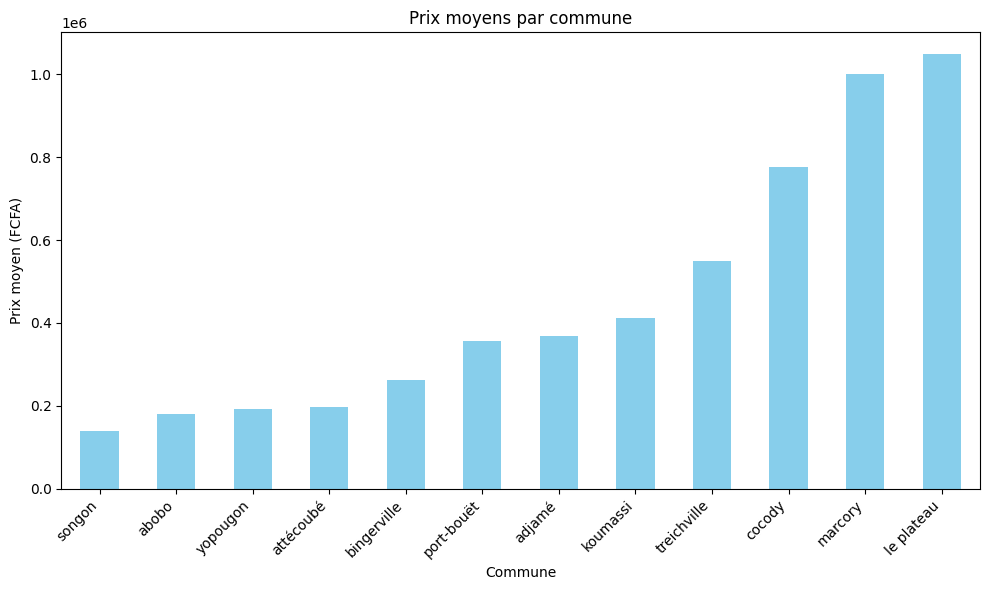

code_var 2014
401000008    2.576000e+05
401000011    7.846429e+05
401000002    7.963064e+05
401000010    1.104571e+06
401000006    1.168657e+06
Name: price, dtype: float64


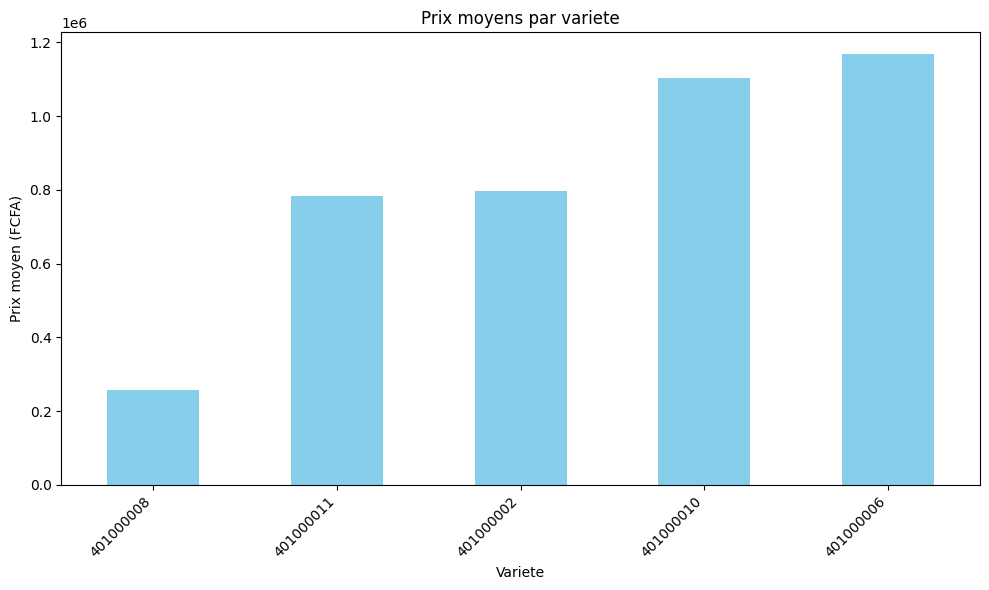

In [7]:
# !pip install dico/fr_core_news_md-3.7.0-py3-none-any.whl
# !pip install pandas
# !pip install fuzzywuzzy
# !pip install python-Levenshtein
# !pip install regex

import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
import os
from urllib.parse import urlparse
from fuzzywuzzy import fuzz
import platform

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_md")


list_mois = ["Mai", "Juin", "Juillet"]

for mois in list_mois:



    if platform.system() == 'Windows':
        folder = f'D:\\Bureau\\MemoiresStages\\Travaux_techniques\\Scrapping\\Datasets\\{mois}'
    else:
        folder = f'/mnt/d/Bureau/MemoiresStages/Travaux_techniques/Scrapping/Datasets/{mois}'
        
    # Fonction pour obtenir tous les fichiers CSV dans un dossier et ses sous-dossiers
    def get_all_csv_files(folder):
        csv_files = []
        for root, _, files in os.walk(folder):
            for file in files:
                if file.endswith('.csv'):
                    csv_files.append(os.path.join(root, file))
        print(f"Les traitements sont en cours pour le mois de {mois}, cela pourrait prendre quelques minutes...")
        return csv_files

    # Obtenir la liste de tous les fichiers CSV
    file_paths = get_all_csv_files(folder)

    # Charger et fusionner les fichiers
    df_list = [pd.read_csv(file) for file in file_paths]
    df = pd.concat(df_list, ignore_index=True)


    # Convertir toutes les valeurs en minuscules pour les colonnes de type str, sauf pour les colonnes spécifiées
    columns_to_exclude = ['superficie', 'nb_pieces', 'nb_salle_de_bain', 'scraping_date', 'link']
    df = df.apply(lambda col: col.str.lower() if col.name not in columns_to_exclude and col.dtype == 'object' else col)

    # Filtrer les lignes en fonction de la longueur de la description
    seuil_longueur_description = 200
    df = df[df['description'].str.len() >= seuil_longueur_description]

    # Fonction pour extraire le nom de domaine à partir de l'URL
    def extract_site(link):
        try:
            return urlparse(link).netloc
        except:
            return None

    # Ajouter la colonne 'site' en extrayant le nom de domaine de la colonne 'link'
    if 'link' in df.columns:
        df['site'] = df['link'].apply(extract_site)
        
        
    # Fonction pour extraire la date à partir de 'scraping_date'
    def extract_date(scraping_date):
        try:
            return scraping_date.split(' ')[0]
        except:
            return None

    # Ajouter la colonne 'date' en extrayant la date de 'scraping_date'
    if 'scraping_date' in df.columns:
        df['date'] = df['scraping_date'].apply(extract_date)

    # Convertir la colonne 'date' au format datetime
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')



    # Supprimer les lignes où 'price' contient des indications de paiement journalier
    df = df[~df['price'].str.contains(r'par jour|/ jour', case=False, na=False)]

    # Supprimer les lignes avec des prix manquants
    df = df.dropna(subset=['price'])


    # Fonction pour nettoyer et convertir les valeurs de 'price' en format numérique
    def clean_price(price):
        # Extraire les chiffres de la chaîne de caractères
        price = re.sub(r'[^\d]', '', str(price))
        # Convertir en entier
        return float(price) if price.isdigit() else None

    # Fonction pour nettoyer et convertir les valeurs de 'superficie' en format float
    def clean_superficie(superficie):
        # Retirer toutes les occurrences de "m2" et extraire les chiffres
        superficie = re.sub(r'\s*m2\s*', '', str(superficie), flags=re.IGNORECASE)
        # Convertir en float
        try:
            return float(superficie)
        except ValueError:
            return None
        

    # Appliquer la fonction de nettoyage sur la colonne 'price'
    df['price'] = df['price'].apply(clean_price)
    # Supprimer les lignes avec un prix inférieur à 20000
    df = df[df['price'] > 9999]

    # Appliquer la fonction de nettoyage sur la colonne 'superficie' et renommer la colonne
    if 'superficie' in df.columns:
        df['superficie_m2'] = df['superficie'].apply(clean_superficie)
        df.drop(columns=['superficie'], inplace=True)


    # Détection et suppression des lignes évoquant la vente, entrepôt ou avec un prix > 10000000
    vente_keywords = ['vente', 'vendre', 'à vendre', 'a vendre', 'prix de vente', 'coût de vente', 'cout de vente']
    entrepot_keywords = ['entrepôt', 'entrepot', 'hotel', 'hôtel', 'saisonnière', 'saisonniere', 'bureau']

    def is_for_sale_or_entrepot(description, price):
        if isinstance(description, str) and (any(keyword in description for keyword in vente_keywords) or any(keyword in description for keyword in entrepot_keywords)):
            return True
        if price and price > 6000000:
            return True
        return False

    df = df[~df.apply(lambda row: is_for_sale_or_entrepot(row['description'], row['price']), axis=1)]


    # Supprimer les lignes contenant plusieurs biens immobiliers dans le titre
    multiple_properties_regex1 = r'appartements|studios|maisons|villas|bureaux'
    df = df[~df['title'].str.contains(multiple_properties_regex1, case=False, na=False)]

    # Supprimer les lignes contenant plusieurs biens immobiliers dans le titre
    multiple_properties_regex2 = r','
    df = df[~df['title'].str.contains(multiple_properties_regex2, case=False, na=False)]

    # Supprimer les lignes contenant "et" dans le titre
    df = df[~df['title'].str.contains(r'\bet\b', case=False, na=False)]

    # Supprimer les lignes contenant "terrain" dans le titre
    df = df[~df['title'].str.contains(r'\bterrain\b', case=False, na=False)]


    ## il s'agit de supprimer les lignes ou les prix sont donnees par jour et non par mois et pour lequelles on ne retrouve pas dans la concatenation de title et description
    # Définir le seuil
    seuil = 50000

    # Expressions régulières pour détecter les valeurs de prix et les termes indiquant un prix par jour
    jour_patterns = r"(/|la|par)\s*(nuitée|nuit|jour)"
    price_patterns = lambda price: fr"{price}|{price // 1000}k|{price}f|{price}fcfa|{price}f cfa|{price // 1000}\s*000"

    def should_remove_row(row, seuil):
        price = row['price']
        title_desc = f"{row['title']} {row['description']}"
        
        # Si le prix est inférieur au seuil, on commence les vérifications
        if price < seuil:
            # Rechercher la valeur de price sous différentes formes
            price_pattern = price_patterns(price)
            match = re.search(price_pattern, title_desc)
            if match:
                # Vérifier si elle est associée à une indication de tarif journalier
                price_index = match.end()  # Position de la fin de la correspondance du prix
                # Vérifier les mots qui suivent immédiatement la valeur trouvée
                after_price_text = title_desc[price_index:price_index+20]  # Prendre les 20 caractères suivants
                if re.search(jour_patterns, after_price_text):
                    # Rechercher d'autres valeurs numériques plus élevées dans la chaîne
                    higher_prices = [int(p.replace(' ', '').replace('k', '000').replace('f', '').replace('fcfa', '')) for p in re.findall(r'\b\d{1,3}(?:\s?\d{3})*f?\b', title_desc)]
                    higher_prices = [p for p in higher_prices if p > price]
                    if higher_prices:
                        # Vérifier si une de ces valeurs est mensuelle
                        for hp in higher_prices:
                            hp_pattern = price_patterns(hp)
                            match_hp = re.search(hp_pattern, title_desc)
                            if match_hp:
                                hp_index = match_hp.end()
                                after_hp_text = title_desc[hp_index:hp_index+20]
                                if not re.search(jour_patterns, after_hp_text):
                                    return False  # On garde la ligne car on a trouvé un prix mensuel
                    return True  # Aucune valeur mensuelle trouvée, on supprime la ligne
                else:
                    return False  # La valeur n'est pas indiquée comme journalière, on garde la ligne
            else:
                return True  # Aucune correspondance avec le prix, on supprime la ligne
        return False  # Prix au-dessus du seuil, on garde la ligne

    # Appliquer cette fonction pour supprimer les lignes indésirables
    df = df[~df.apply(should_remove_row, axis=1, seuil=seuil)]


    # Expression régulière pour identifier les types de logement
    housing_types_pattern = r'(appartement|villa|studio|penthouse|maison|duplex)'

    # Filtrer les lignes où le title ne contient pas les types de logement spécifiés
    df = df[df['title'].str.contains(housing_types_pattern, case=False, na=False)]


    # Fonction pour nettoyer la colonne 'nb_salle_de_bain'
    def clean_nb_salle_de_bain(nb_salle_de_bain):
        if pd.isna(nb_salle_de_bain):
            return None
        # Utiliser une expression régulière pour extraire le nombre
        match = re.search(r'\d+', nb_salle_de_bain)
        if match:
            return int(match.group())
        return None

    # Convertir toute la colonne 'nb_salle_de_bain' en string avant de faire le traitement
    if 'nb_salle_de_bain' in df.columns:
        df['nb_salle_de_bain'] = df['nb_salle_de_bain'].astype(str)
        df['nb_salle_de_bain'] = df['nb_salle_de_bain'].apply(clean_nb_salle_de_bain)

    # Convertir la colonne 'nb_salle_de_bain' en type Int64
    df['nb_salle_de_bain'] = df['nb_salle_de_bain'].astype('Int64')


    # Fonction pour gérer les doublons primaires
    def remove_primary_duplicates(df):
        primary_columns = [col for col in df.columns if col not in ['scraping_date', 'date']]
        duplicates = df[df.duplicated(subset=primary_columns, keep=False)]
        primary_duplicates_count = duplicates.shape[0]
        print(f"Nombre de doublons primaires détectés: {primary_duplicates_count}")
        df = df.drop_duplicates(subset=primary_columns, keep='first')
        return df, duplicates

    # Appliquer la suppression des doublons primaires
    df, primary_duplicates = remove_primary_duplicates(df)


    # Fonction pour gérer les doublons secondaires
    def remove_secondary_duplicates(df):
        df['description_clean'] = df['description'].apply(lambda x: re.sub(r'\W+', ' ', str(x)))
        duplicates = set()
        seen = set()

        for i, row in df.iterrows():
            if i in seen:
                continue
            for j, other_row in df.iterrows():
                if i != j and j not in seen:
                    similarity = fuzz.token_set_ratio(row['description_clean'], other_row['description_clean'])
                    if similarity > 99:
                        duplicates.add(j)
                        seen.add(j)
                        break  # Exit the inner loop to ensure only one duplicate is removed

        secondary_duplicates_count = len(duplicates)
        print(f"Nombre de doublons secondaires détectés: {secondary_duplicates_count}")

        duplicates_list = list(duplicates)
        secondary_duplicates = df.loc[duplicates_list]
        df = df.drop(duplicates_list)
        df.drop(columns=['description_clean'], inplace=True)
        return df, secondary_duplicates

    # Appliquer la suppression des doublons secondaires
    df, secondary_duplicates = remove_secondary_duplicates(df)

    print(f'Restants {len(df)}')


    # Dictionnaire pour les grappes et leurs régions associées
    grappe_to_region = {
        'abidjan': ['abidjan'],
        'nord': [r'bafing', r'bagou(é|e)', r'folon', r'kabadougou', r'poro', r'tchologo', r'worodougou'],
        'centre': [r'b(é|e)lier', r'gb(ê|e)k(ê|e)', r'hambol', r'iffou', r'marahou(é|e)', r'moronou', r'n’zi', r'yamoussoukro \(district autonome\)'],
        'est': [r'bounkani', r'gontougo', r'ind(é|e)ni(é|e)-djuablin', r'm(é|e)', r'sud-como(é|e)', r'zanzan'],
        'ouest': [r'agn(é|e)by-tiassa', r'b(é|e)r(é|e)', r'cavally', r'gb(ô|o)kl(é|e)', r'g(ô|o)h', r'grands-ponts', r'gu(é|e)mon', r'haut-sassandra', r'l(ô|o)h-djiboua', r'nawa', r'san-p(é|e)dro', r'tonkpi']
    }


    region_to_ville = {
        # Région d'Abidjan
        'abidjan': ['abidjan'],
        # Autres régions
        'bafing': ['touba'],
        'bagoué': [r'boundiali'],
        'folon': ['minignan'],
        'kabadougou': [r'odienn(é|e)'],
        'poro': ['korhogo'],
        'tchologo': [r'ferkess(é|e)dougou'],
        'worodougou': [r's(é|e)gu(é|e)la'],
        'bélier': [r'yamoussoukro'],
        'gbêkê': [r'bouak(é|e)'],
        'hambol': [r'katiola'],
        'iffou': [r'daoukro'],
        'marahoué': [r'bouafl(é|e)'],
        'moronou': [r'bongouanou'],
        'n’zi': [r'dimbokro'],
        'bounkani': [r'bouna'],
        'gontougo': [r'bondoukou'],
        'indénié-djuablin': [r'abengourou'],
        'mé': [r'adzop(é|e)'],
        'sud-comoé': [r'aboisso'],
        'agnéby-tiassa': [r'agboville'],
        'béré': [r'mankono'],
        'cavally': [r'guiglo'],
        'gbôklé': [r'sassandra'],
        'gôh': [r'gagnoa'],
        'grands-ponts': [r'dabou'],
        'guémon': [r'du(é|e)kou(é|e)'],
        'haut-sassandra': [r'daloa'],
        'lôh-djiboua': [r'divo'],
        'nawa': [r'soubr(é|e)'],
        'san-pédro': [r'san-p(é|e)dro'],
        'tonkpi': [r'man']
    }


    # Dictionnaire pour les communes et leurs quartiers associés (seulement pour Abidjan)
    commune_to_quartier = {
        # Abobo
        'abobo': [r'abobo baoul(é|e)', r'abobo doum(é|e)', r'pk18', r'anonkoua kout(é|e)', r'avocatier', r'belleville', r'derri(è|e)re rails', r'n’dotr(é|e)', r'samak(é|e)'],
        # Adjamé
        'adjamé': [r'williamsville', r'bracodi', r'ind(é|e)ni(é|e)', r'adjam(é|e) 220 logements', r'adjam(é|e) village', r'libert(é|e)', r'habitat', r'fraternit(é|e)'],
        # Attécoubé
        'attécoubé': [r'banco', r'abobodoum(é|e)', r'locodjro', r'mossikro', r'agban', r'anonkoua', r'att(é|e)coub(é|e) village'],
        # Cocody
        'cocody': [r'angr(é|e)', r'abatta', r'rivi(é|e)ra', r'rivi(é|e)ra 1', r'rivi(é|e)ra 2', r'rivi(é|e)ra 3', r'rivi(é|e)ra 4', r'palmeraie', r'deux plateaux', r'danga', r'mermoz', r'vallon', r'cit(é|e) des arts', r'cit(é|e) rouge', r'ambassade', r'golf', r'faya'],
        # Koumassi
        'koumassi': [r'divo', r'remblais', r'prodomo', r'campement', r'sicogi', r'grand campement', r'zone industrielle'],
        # Marcory
        'marcory': [r'zone 4', r'bi(é|e)try', r'anoumabo', r'hibiscus', r'r(é|e)sidentiel', r'zone 3', r'zone 4c'],
        # Le Plateau
        'le plateau': [r'plateau ind(é|e)ni(é|e)', r'plateau dokui', r'plateau vallon', r'plateau centre', r'plateau nord', r'plateau sud'],
        'plateau': [r'plateau ind(é|e)ni(é|e)', r'plateau dokui', r'plateau vallon', r'plateau centre', r'plateau nord', r'plateau sud'],
        # Port-Bouët
        'port-bouët': [r'gonzagueville', r'vridi', r'adjouffou', r'jean folly', r'port', r'petit bassam', r'vridi canal'],
        # Treichville
        'treichville': [r'arras', r'belleville', r'zone 3', r'avenue 16', r'avenue 8', r'avenue 12', r'avenue 21'],
        # Yopougon
        'yopougon': [r'niangon', r'sid(é|e)ci', r'toits rouges', r'andokoi', r'selmer', r'maroc', r'kout(é|e)', r'wassakara', r'sicogi', r'gesco']
    }

    # Dictionnaire pour les villes et leurs communes (seulement pour Abidjan)
    ville_to_commune = {
        'abidjan': ['abobo', 'adjamé', 'attécoubé', 'cocody', 'koumassi', 'marcory', 'le plateau', 'port-bouët', 'treichville', 'yopougon', 'anyama', 'bingerville', 'songon']
    }



    # Fonction pour extraire les informations de localisation
    def extract_location_info(text):
        # Convertir en minuscules et diviser le texte en tokens
        tokens = re.findall(r'\b\w+\b', text)
        
        grappe, region, ville, commune, quartier = None, None, None, None, None

        # Recherche du quartier et déduction de la commune et de la région pour Abidjan
        for commune_key, quartiers in commune_to_quartier.items():
            for quartier_key in quartiers:
                quartier_tokens = re.findall(r'\b\w+\b', quartier_key)
                if all(token in tokens for token in quartier_tokens):
                    quartier = quartier_key
                    commune = commune_key
                    ville = 'abidjan'
                    region = 'abidjan'
                    grappe = 'abidjan'
                    return grappe, region, ville, commune, quartier

        # Recherche de la commune et déduction de la région pour Abidjan
        for commune_key in ville_to_commune['abidjan']:
            commune_tokens = re.findall(r'\b\w+\b', commune_key)
            if all(token in tokens for token in commune_tokens):
                commune = commune_key
                ville = 'abidjan'
                region = 'abidjan'
                grappe = 'abidjan'
                return grappe, region, ville, commune, quartier

        # Recherche de la ville et déduction de la région
        for region_key, villes in region_to_ville.items():
            for ville_key in villes:
                ville_tokens = re.findall(r'\b\w+\b', ville_key)
                if all(token in tokens for token in ville_tokens):
                    ville = ville_key
                    region = region_key
                    for grappe_key, regions in grappe_to_region.items():
                        if region in regions:
                            grappe = grappe_key
                    return grappe, region, ville, None, None

        return grappe, region, ville, commune, quartier

    # Appliquer la fonction à chaque ligne du DataFrame
    df['grappe'], df['region'], df['ville'], df['commune'], df['quartier'] = zip(*df.apply(
        lambda row: extract_location_info(f"{row['title']} {row['localisation']} {row['description']}"), axis=1))


    df = df.dropna(subset=['grappe', 'region'])


    # Fonction pour nettoyer la colonne 'nb_pieces' et la convertir en int
    def clean_nb_pieces(nb_pieces):
        if pd.isna(nb_pieces):
            return None
        # Extraire les chiffres de la chaîne de caractères et les convertir en entier
        match = re.search(r'\d+', str(nb_pieces))
        if match:
            return int(match.group())
        return None

    # Appliquer la fonction pour nettoyer 'nb_pieces'
    df['nb_pieces'] = df['nb_pieces'].apply(clean_nb_pieces)


    def extract_nb_pieces_if_different(row):
        # Extraire le nombre de pièces du titre
        match = re.search(r'\b(\d+)\s*(pi[eè]ces?|pcs?)\b', row['title'])
        if match:
            nb_pieces_title = int(match.group(1))
            # Vérifier si le nombre de pièces extrait du titre est différent de celui existant
            if row['nb_pieces'] != nb_pieces_title:
                return nb_pieces_title
        # Cas particulier pour "studio" ou "chambre salon"
        if "studio" in row['title'].lower() or "chambre salon" in row['title'].lower():
            return 1
        return row['nb_pieces']

    # Appliquer la fonction sur chaque ligne du DataFrame
    if 'title' in df.columns and 'nb_pieces' in df.columns:
        df['nb_pieces'] = df.apply(extract_nb_pieces_if_different, axis=1)

    # Convertir 'nb_pieces' en int (si cela est nécessaire)
    df['nb_pieces'] = df['nb_pieces'].astype('Int64')


    def supprimer_lignes_nb_pieces_manquant(df):
        # Définir le motif regex
        motif = re.compile(r'\b(\d+)\s*(pi[eè]ces?|pcs?)\b')

        def garder_ligne(row):
            # Vérifier si 'nb_pieces' est manquant
            if pd.isna(row['nb_pieces']):
                # Vérifier si le motif n'est pas trouvé dans la description
                if not motif.search(str(row['description'])):
                    return False
            return True

        # Appliquer la fonction pour filtrer les lignes
        df = df[df.apply(garder_ligne, axis=1)]
        return df

    # Appliquer la fonction au dataframe
    df = supprimer_lignes_nb_pieces_manquant(df)


    def imputer_nb_pieces(df):
        # Définir le motif regex pour trouver le nombre de pièces
        motif = re.compile(r'\b(\d+)\s*(pi[eè]ces?|pcs?)\b')

        def imputer_ligne(row):
            # Vérifier si 'nb_pieces' est manquant
            if pd.isna(row['nb_pieces']):
                # Rechercher le motif dans la description
                match = motif.search(str(row['description']))
                if match:
                    # Extraire et retourner le nombre de pièces
                    row['nb_pieces'] = int(match.group(1))
            return row

        # Appliquer la fonction pour imputer les valeurs manquantes de 'nb_pieces'
        df = df.apply(imputer_ligne, axis=1)
        return df

    # Appliquer la fonction au dataframe
    df = imputer_nb_pieces(df)


    # Fonction pour déterminer le type d'immobilier
    def classify_immobilier(row):
        text = ' '.join([row['title'], row['description']])
        text2 = str(row['nb_pieces'])
        if re.search(r'1', text2, re.IGNORECASE):
            return 'studio'
        if re.search(r'\b(duplex|triplex)\b', text, re.IGNORECASE):
            return 'duplex'
        if re.search(r'\b(villa)\b', text, re.IGNORECASE):
            return 'villa'
        if re.search(r'\b(appartement|penthouse)\b', text, re.IGNORECASE):
            return 'appartement'
        return 'maison'

    # Appliquer la fonction pour créer la colonne 'type_d_immobilier'
    df['type d\'immobilier'] = df.apply(classify_immobilier, axis=1)


    # Mapping dictionary to standardize type d'immobilier
    harmonization_map = {
        r'appartements': 'appartement',
        r'penthouse': 'appartement',
        r'maisons': 'maison',
        r'villas': 'villa',
        r'studios': 'studio',
        r'duplex': 'duplex'
    }

    # Function to harmonize type d'immobilier
    def harmonize_type_immobilier(type_immobilier):
        if pd.isna(type_immobilier):
            return None
        for pattern, replacement in harmonization_map.items():
            if re.search(pattern, type_immobilier, re.IGNORECASE):
                return replacement
        return type_immobilier

    # Apply the harmonization function to the 'type d'immobilier' column
    df['type d\'immobilier'] = df['type d\'immobilier'].apply(harmonize_type_immobilier)

    df = df.dropna(subset=['type d\'immobilier'])


    # Fonction pour déterminer si les toilettes sont internes
    def has_toilettes_internes(description):
        return 0 if re.search(r"(toilette|wc|douche|salle d'eau) externe", description, re.IGNORECASE) else 1

    # Fonction pour déterminer si la cour est commune
    def has_cours_commune(description):
        return 1 if re.search(r"cours commune", description, re.IGNORECASE) else 0

    # Appliquer les fonctions pour créer les nouvelles variables
    df['Avec_eau'] = 1
    df['Avec_electricite'] = 1
    df['Materiaux_en_dur'] = 1
    df['Toilettes_internes'] = df['description'].apply(has_toilettes_internes)
    df['cours_commune'] = df['description'].apply(has_cours_commune)


    # Définir la liste des quartiers chics
    quartiers_chics = [
        r'angré', 
        r'riviera', 
        r'riviera 1', 
        r'riviera 2', 
        r'riviera 3', 
        r'riviera 4', 
        'palmeraie', 
        'deux plateaux', 
        'danga', 
        'mermoz', 
        r'vallon', 
        'cité des arts', 
        'zone 4', 
        'biétry', 
        'hibiscus', 
        'résidentiel', 
        'plateau',
        'le plateau',
        'ambassade',
        'golf',
        'faya',
        'residentiel'
    ]

    # Fonction pour déterminer si la localisation est dans un quartier chic
    def is_quartier_chic(quartier):
        if pd.isna(quartier): 
            return 0
        quartier = str(quartier)
        for quartier1 in quartiers_chics:
            if re.search(quartier1, quartier, re.IGNORECASE):
                return 1
        return 0

    # Appliquer la fonction pour créer la variable 'quartier_chic'
    df['quartier_chic'] = df['quartier'].apply(is_quartier_chic)

    # Fonction pour classifier le nombre de pièces
    def classify_nb_pieces(nb_pieces):
        if nb_pieces == 1:
            return r'1 pièce'
        elif 2 <= nb_pieces <= 3:
            return r'2 et 3 pièces'
        elif nb_pieces >= 4:
            return r'4 pièces et plus'
        else:
            return 'non spécifié'

    # Appliquer la fonction pour créer la colonne 'nb_pieces_classe'
    df['nb_pieces_classe'] = df['nb_pieces'].apply(classify_nb_pieces)

    code_mapping = {
        
    #'type', 'pieces', 'eau', 'elec', 'en_dur', 'wc', 'cours_com', 'quartier'
        
        # Loyer brut mensuel d'une chambre dans une baraque sans abonnement electrique per
        (r'chambre', r'1 pièce', r'1', r'0', r'0', r'0', r'1', r'0'): "401000001",
        (r'chambre', r'1 pièce', r'0', r'0', r'0', r'0', r'1', r'0'): "401000001",
        (r'chambre', r'1 pièce', r'1', r'0', r'0', r'0', r'0', r'0'): "401000001",
        (r'chambre', r'1 pièce', r'0', r'0', r'0', r'0', r'0', r'0'): "401000001",
        
        # Loyer d'un appartement moderne, Avec/sans eau: avec, Avec/sans electricité: avec
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'1', r'1'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'1', r'1'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'1'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'0', r'1'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'1', r'0'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'1', r'0'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'0'): "401000002",
        (r'appartement', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'0', r'0'): "401000002",
        #
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'1', r'1'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'0', r'1', r'1'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'1'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'0', r'0', r'1'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'1', r'0'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'0', r'1', r'0'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'0'): "401000002",
        (r'appartement', r'4 pièces et plus', r'1', r'1', r'1', r'0', r'0', r'0'): "401000002",

        # Loyer brut mensuel d'une maison de 2 à  3 pièces dans une cour commune avec toile
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'1', r'1'): "401000003",
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'1', r'0'): "401000003",
        
        # Loyer brut mensuel d'un logement de 2 à  3 pièces dans une cour commune sans toil
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'1', r'1'): "401000004",
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'0', r'1', r'0'): "401000004",
        
        # Loyer d'une maison, Cour commune: Non, Matériaux: en dur, toilettes internes: oui
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'1'): "401000005",
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'0'): "401000005",
        
        
        # Loyer d'une maison duplex , Matériaux: en dur, toilettes internes: oui 1 ou plusieurs, type de quartier : chic.
        (r'duplex', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'1'): "401000006",
        (r'duplex', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'0'): "401000006",
        
        # Loyer d'un logement, Type: studio, Nombre de chambre à coucher:  1, Matériaux;  dur, Cour commune: Non,  Toilettes internes: Oui. Autres caractéristiques: à plusieurs appartements,
        (r'studio', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'1'): "401000007",
        (r'appartement', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'1'): "401000007",
        (r'studio', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'0'): "401000007",
        (r'appartement', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'0'): "401000007",
        
        # Loyer d'un logement, Type: studio, Nombre de chambre à coucher:  1, Matériaux;  dur, Cour commune: Non,  Toilettes internes: Oui. Autres caractéristiques: à plusieurs appartements,
        (r'studio', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'1'): "401000008",
        (r'studio', r'1 pièce', r'1', r'1', r'1', r'1', r'0', r'0'): "401000008",

        # Loyer d'un logement, Type: studio, Nombre de chambre à coucher:  1, Matériaux;  dur, Cour commune: Oui,  Toilettes internes: non, Autres caractéristiques: maison basse, à plusieurs appartements, type de quartier: populaire
        (r'studio', r'1 pièce', r'1', r'1', r'1', r'0', r'1', r'0'): "401000009",

        
        
        #Loyer Villa moderne, clôture: Oui, cours: avec, sanitaires internes: Oui, habitée par un seul locataire: Oui, Type de quartier: résidentiel
        (r'villa', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'1'): "401000010", 
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'1'): "401000010",
        (r'villa', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'1'): "401000010", 
        (r'maison', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'1'): "401000010",
    
        
        #Loyer Villa moderne, clôture: Oui, cours: avec, sanitaires internes: Oui, habitée par un seul locataire: Oui, Type de quartier: populaire
        (r'villa', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'0'): "401000011",
        (r'maison', r'2 et 3 pièces', r'1', r'1', r'1', r'1', r'0', r'0'): "401000011",
        (r'villa', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'0'): "401000011",
        (r'maison', r'4 pièces et plus', r'1', r'1', r'1', r'1', r'0', r'0'): "401000011",
    }


    # Fonction pour obtenir le code de classification
    def get_classification_code(row, code_mapping):
        key = (
            row['type d\'immobilier'],
            row['nb_pieces_classe'],
            str(row['Avec_eau']),
            str(row['Avec_electricite']),
            str(row['Materiaux_en_dur']),
            str(row['Toilettes_internes']),
            str(row['cours_commune']),
            str(row['quartier_chic'])
        )
        code = code_mapping.get(key, None)
        if code is None:
            print(f"Key not found: {key}")
        return code


    # Appliquer la fonction pour créer la colonne 'code_var 2014'
    df['code_var 2014'] = df.apply(get_classification_code, axis=1, code_mapping=code_mapping)


    df = df.dropna(subset=['code_var 2014'])


    # Définir les dictionnaires de mots regroupés
    commodities = {
        'wifi': [r'wifi', r'internet', r'connexion', r'fibre optique'],
        'jardin': [r'jardin(\.locat\d+)?'],
        'meubler': [r'meubl(er|é|e)'],
        'climatisation': [r'climat(isé|isation|iseur)', r'air conditionner', r'split'],
        'garage': [r'garage'],
        'balcon': [r'balcon'],
        'sécuriser': [r'sécur(is|it|is)(er|e|é)'],
        'étage': [r'étage'],
        'parking': [r'parking'],
        'douche': [r'douche'],
        'séjour': [r'séjour', r'sejour'],
        'équiper': [r'équip(er|é|e|ée|ement)'],
        'placard': [r'placard'],
        'salle': [r'salle'],
        'manger': [r'manger'],
        'bureau': [r'bureau'],
        'piscine': [r'piscine'],
        'gardien': [r'gardi(en|en)', r'garde'],
        'électrogène': [r'électrogène'],
        'four': [r'four'],
        'cinéma': [r'cinéma', r'netflix'],
        'ascenseur': [r'ascenseur'],
        'double vitrage': [r'double vitrage'],
        'terrasse': [r'terrasse'],
        'toilette': [r'toilette', r'wc'],
        'buanderie': [r'buanderie'],
        'chauffe': [r'chauff(e|e-eau)'],
        'cuisine': [r'cuisine']
    }

    natural_externalities = {
        'bord_de_mer': [r'plage', r'mer', r'océan'],
        'forêt': [r'for(ê|e)t'],
        'parc': [r'parc'],
        'montagne': [r'montagne'],
        'rivière': [r'rivi(è|e)re'],
        'lac': [r'lac']
    }

    artificial_externalities = {
        'zone_commerciale': [r'centre commercial', r'marché', r'zone commerciale'],
        'pharmacie': [r'pharmacie'],
        'restaurant': [r'restaurant', r'resto'],
        'bar': [r'bar', r'maquis'],
        'ambassade': [r'ambassade'],
        'école': [r'écol(e|es)', r'crèch(e|es)', r'lycé(e|es)', r'universit(é|és)'],
        'hôpital': [r'hôpital', r'clinique', r'dispensaire', r'CHU', r'CHR', r'medecin']
    }

    # Fonction pour extraire les informations de la description
    def extract_description_info(df, grouped_words):
        def extract_info(description):
            if not isinstance(description, str):
                return {key: 0 for key in grouped_words}
            
            doc = nlp(description)
            info = {key: 0 for key in grouped_words}
            
            negation = False
            for token in doc:
                if token.dep_ == 'neg':
                    negation = True
                for key, patterns in grouped_words.items():
                    for pattern in patterns:
                        if re.search(pattern, token.lemma_):
                            info[key] = 0 if negation else 1
                            negation = False
            
            return info
        
        description_info = df['description'].apply(extract_info)
        
        for key in grouped_words.keys():
            df[key] = description_info.apply(lambda x: x[key])
        
        return df

    # Appliquer les fonctions pour extraire les informations des commodités et externalités
    df = extract_description_info(df, commodities)
    df = extract_description_info(df, natural_externalities)
    df = extract_description_info(df, artificial_externalities)

    # Créer les variables 'commodités', 'externalités_naturelles' et 'externalités_artificielles'
    df['commodités'] = df[list(commodities.keys())].max(axis=1)
    df['externalités_naturelles'] = df[list(natural_externalities.keys())].max(axis=1)
    df['externalités_artificielles'] = df[list(artificial_externalities.keys())].max(axis=1)



    # Exporter le dataframe final avec les modifications
    import platform
    if platform.system() == 'Windows':
        output_path_final = f'D:\\Bureau\\MemoiresStages\\Travaux_techniques\\Traitements\\Datasets\\{mois}.csv'
    else:
        output_path_final = f'/mnt/d/Bureau/MemoiresStages/Travaux_techniques/Traitements/Datasets/{mois}.csv'

    df.to_csv(output_path_final, index=False)

    print(f"Fichier final avec les modifications sauvegardé sous {output_path_final}")


    # Calculer les prix moyens par commune
    prix_moyens_par_commune = df.groupby("commune")['price'].mean().sort_values()

    # Afficher les prix moyens par commune
    print(prix_moyens_par_commune)


    # Créer un graphique en barres
    plt.figure(figsize=(10, 6))
    prix_moyens_par_commune.plot(kind='bar', color='skyblue')

    # Ajouter un titre et des labels
    plt.title('Prix moyens par commune')
    plt.xlabel('Commune')
    plt.ylabel('Prix moyen (FCFA)')
    plt.xticks(rotation=45, ha='right')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

    # Calculer les prix moyens par commune
    prix_moyens_par_commune = df.groupby("code_var 2014")['price'].mean().sort_values()

    # Afficher les prix moyens par commune
    print(prix_moyens_par_commune)


    # Créer un graphique en barres
    plt.figure(figsize=(10, 6))
    prix_moyens_par_commune.plot(kind='bar', color='skyblue')

    # Ajouter un titre et des labels
    plt.title('Prix moyens par variete')
    plt.xlabel('Variete')
    plt.ylabel('Prix moyen (FCFA)')
    plt.xticks(rotation=45, ha='right')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()